<a href="https://colab.research.google.com/github/Parsa132000/covid19-global-eda/blob/main/covid19_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


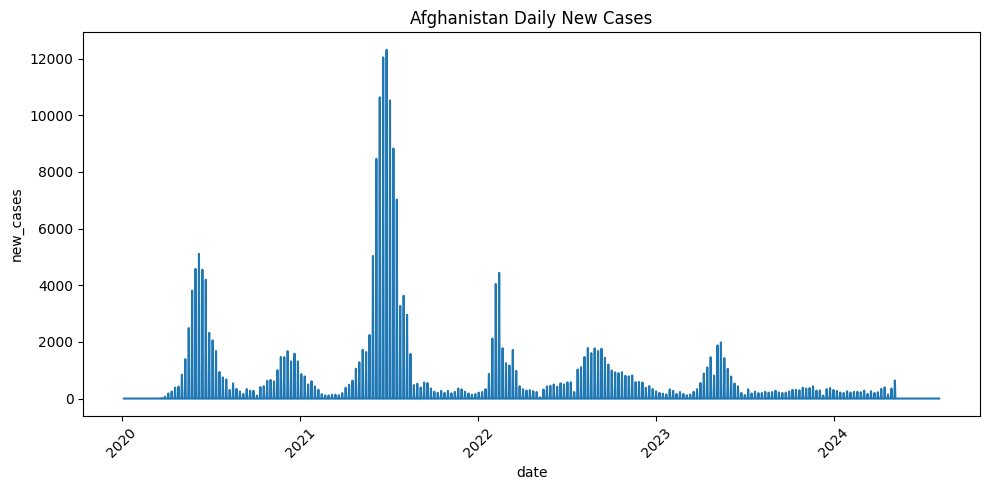

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

Afghanistan = df[df['location'] == 'Afghanistan']
plt.figure(figsize=(10, 5))
sns.lineplot(data=Afghanistan, x='date', y='new_cases')
plt.title("Afghanistan Daily New Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
country_name = 'Afghanistan'
country_df = df[df['location'] == country_name]

# Quick overview
country_df[['date', 'new_cases', 'new_deaths', 'people_fully_vaccinated_per_hundred']].tail()


,date,new_cases,new_deaths,people_fully_vaccinated_per_hundred
1669,2024-07-31,0.0,0.0,NaN
1670,2024-08-01,0.0,0.0,NaN
1671,2024-08-02,0.0,0.0,NaN
1672,2024-08-03,0.0,0.0,NaN
1673,2024-08-04,0.0,0.0,NaN


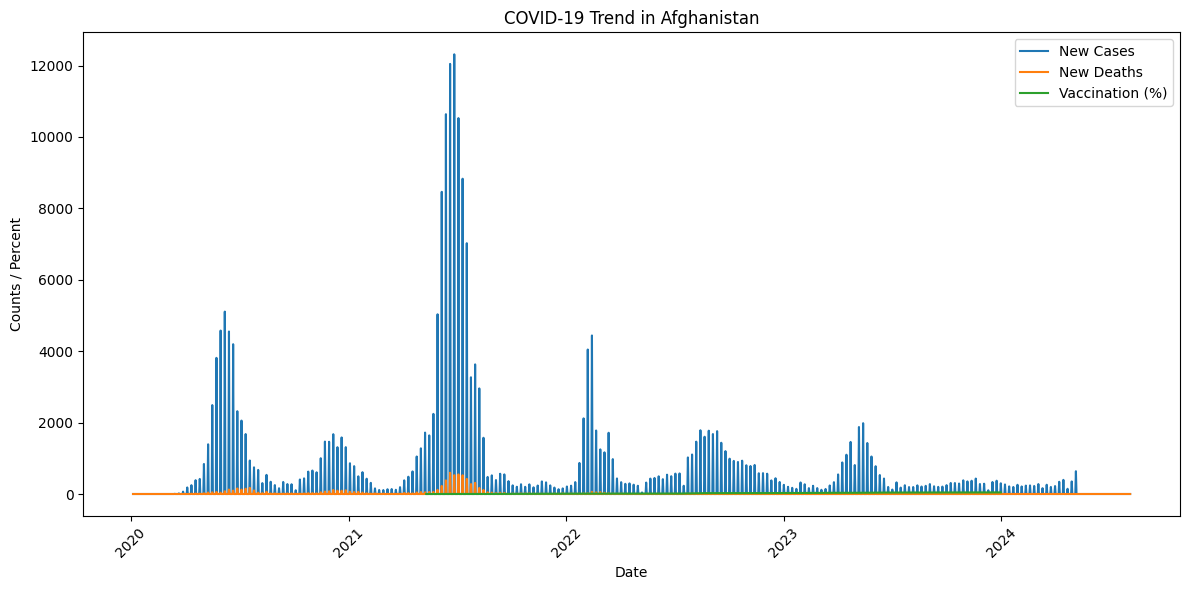

In [5]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=country_df, x='date', y='new_cases', label='New Cases')
sns.lineplot(data=country_df, x='date', y='new_deaths', label='New Deaths')
sns.lineplot(data=country_df, x='date', y='people_fully_vaccinated_per_hundred', label='Vaccination (%)')

plt.title(f"COVID-19 Trend in {country_name}")
plt.xlabel("Date")
plt.ylabel("Counts / Percent")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
corr_df = country_df[['people_fully_vaccinated_per_hundred', 'new_cases']].dropna()
correlation = corr_df.corr().iloc[0, 1]

print(f"📉 Correlation between vaccination and new cases in {country_name}: {correlation:.2f}")


📉 Correlation between vaccination and new cases in Afghanistan: -0.19


In [7]:
import plotly.express as px

latest = df[df['date'] == df['date'].max()]

fig = px.choropleth(latest,
                    locations='iso_code',
                    color='total_cases_per_million',
                    hover_name='location',
                    title='🌍 Total COVID-19 Cases per Million (Latest)',
                    color_continuous_scale='Viridis')
fig.show()


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prep data
country_df = country_df[['date', 'new_cases']].dropna()
country_df['days'] = (country_df['date'] - country_df['date'].min()).dt.days

# Model
X = country_df[['days']]
y = country_df['new_cases']
model = LinearRegression().fit(X, y)

# Predict future
future_days = pd.DataFrame({'days': range(X['days'].max()+1, X['days'].max()+8)})
preds = model.predict(future_days)

# Show predictions
for i, pred in enumerate(preds):
    print(f"Day {i+1}: {int(pred)} new cases predicted")


Day 1: 35 new cases predicted
Day 2: 35 new cases predicted
Day 3: 35 new cases predicted
Day 4: 35 new cases predicted
Day 5: 35 new cases predicted
Day 6: 34 new cases predicted
Day 7: 34 new cases predicted
